# Heart Failure Prediction

Author: **Marcin Sikorski**<br>
Date: October, 2022

**Introduction**<br>
Heart failure is a serious condition and there is no cure for this disease. It is one of the diseases of affluence in which the patient's heart is not pumping the blood well as the normal heart pumps. Heart failure prediction is a complex task in the medical field. This caused researchers and doctors to turn to modern approaches like data science and machine learning for predicting the disease.

The subject of this repository is to perform binary classification based on patient's collected features (age, cholesterol level, fasting blood sugar, etc.). We will implement different machine learning models which can categorize these labels. We will use supervised learning with the <code>scikit-learn</code> library. The dataset is avaiable on Kaggle or can be downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/heart+disease). We will also strive to apply better usage of this data to enhance cardiological care sector.

**Notebook Content:**
1. Setting Up the Environment and Reading the Dataset
2. Data Cleansing<br>
    2a. Categorical Data<br>
    2b. Continuous Data<br>
3. Exploratory Data Analysis
4. Relationship Exploration for Categorical Data
5. Relationship Exploration for Continuous Data
6. Normalizing and Splitting Data
7. Developing Classifiers<br>
    7a. Logistic Regression<br>
    7b. k-Nearest Neighbors<br>
    7c. Support Vector Machines<br>
    7d. Random Forest Ensemble<br>
    7e. Gaussian Naïve Bayes<br>
    7f. Gradient Boosting Ensemble<br>
    7g. Stochastic Gradient Descent<br>
    7h. Multi-Layer Perceptron<br>
8. Evaluating and Visualizing Model Performance<br>
    8a. Accuracies<br>
    8b. Confusion Matrices<br>
    8c. Decision Boundaries<br>
    8d. ROC Curves<br>
9. Conclusion

### 1. Setting Up the Environment and Reading the Dataset

We will load data from a TXT file into a <code>pandas</code> dataframe and investigate it's columns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# importing data and creating dataframe
def load_dataset():
    file = 'heart.txt'
    df = pd.read_csv(file, header=0, encoding='utf-8')
    
    # removing duplicated rows
    df = df.drop_duplicates()
    return df

df = load_dataset()

print('Number of Instances:', df.shape[0])

Number of Instances: 302


In [2]:
# display first rows
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


**Data Description**

There are 14 features (columns) including the target. We can spot categorical and continuous features. Our target data is the last column <code>output</code>.

Categorical features: **sex**, **cp**, **fbs**, **restecg**, **exng**, **slp**, **caa**, **thall**, **output**.<br>
Continuous features: **age**, **trtbps**, **chol**, **thalachh**, **oldpeak**.

Content and meaning of each column in the data is as below:
* **age** - age in years
* **sex** - sex (gender) of the patient
  * 0: female
  * 1: male
* **cp** - chest pain type
  * 0: typical angina
  * 1: atypical angina
  * 2: non-anginal pain
  * 3: asymptomatic
* **trtbps** - resting blood pressure (in mm Hg)
* **chol** - cholesterol in mg/dl fetched via BMI sensor
* **fbs** - fasting blood sugar > 120 mg/dl
  * 0: false
  * 1: true
* **restecg** - resting electrocardiographic results
  * 0: normal
  * 1: having ST-T wave abnormality
  * 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* **thalachh** - maximum heart rate achieved;
* **exng** - exercise induced angina
  * 0: false
  * 1: true
* **old peak** - ST depression induced by exercise relative to rest;
* **slp** - the slope of the peak exercise ST segment;
  * 0: upsloping
  * 1: flat
  * 2: downsloping
* **caa**: number of major vessels [0-3] colored by flourosopy
* **thall** - thallium stress test results
  * 0: null
  * 1: normal
  * 2: fixed defect
  * 3: reversable defect
* **output** - diagnosis of heart disease (angiographic disease status)
  * 0: < 50% diameter narrowing, less chance of heart disease
  * 1: > 50% diameter narrowing, more chance of heart disease.

### 2. Data Cleansing

We successfully loaded the data file into the repository. We will investigate the data to summarize it, get a good understanding, and see what the data can tell us before the modelling task. We will search for: possible mistakes, feature distribution, patterns, completness and size. At this stage we will clean the data to understand it more.

#### 2a. Categorical Data

We will start from nominal (categorical) features.

In [3]:
# display unique and count null values in each nominal columns
def categorical_summary():  
    # lists
    categ_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
    unique_list = []
    null_list = []
    
    # loop through columns
    for var in categ_features:
        unique_list.append(sorted(df[var].unique()))
        null_list.append(df[var].isnull().sum())
    
    # stack lists into dictionary
    dict = {'Variable': categ_features, 'Unique labels': unique_list, 'Null values': null_list}
    
    return pd.DataFrame(dict).style.hide_index()
    
categorical_summary()

Variable,Unique labels,Null values
sex,"[0, 1]",0
cp,"[0, 1, 2, 3]",0
fbs,"[0, 1]",0
restecg,"[0, 1, 2]",0
exng,"[0, 1]",0
slp,"[0, 1, 2]",0
caa,"[0, 1, 2, 3, 4]",0
thall,"[0, 1, 2, 3]",0
output,"[0, 1]",0


* There are no NaN values in the dataframe and the nominal data is complete. There are no bizarre or dismatching labels.
* Thallium rows with 0 (null) values are actually incorrect. A thallium stress test is a nuclear imaging test that shows how well blood flows into your heart while you're exercising or at rest. A healthy person should have value 1 (normal), while in case of occurrence it should be 2 or 3. This might be a mistake made during data collecting.

In [4]:
# display instances with 0 value for 'thall'
df.loc[df['thall'] == 0]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


Since there are only two rows, we will update them manually. We will accept that these respondents had normal test results and update as without any defects.

In [5]:
# replace 'thall' values
def replace_values():
    # update rows
    df.at[48, 'thall'] = 1
    df.at[281, 'thall'] = 1

replace_values()

#### 2b. Continuous Data

We need to detect possible outliers in our predictors. We will apply the IQR (interquartile) method. Additionally, we will display and count empty cells for each variable.

In [6]:
# display null values and possible outliers in each continuous column
def continuous_summary(): 
    # lists
    contin_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
    null_list = []
    outlier_list = []
    
    # loop through columns
    for var in contin_features:
        null_list.append(df[var].isnull().sum())
        
        # outliers IQR
        Q1 = df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1
        k = 1.5
        outlier_list.append(((df[var] < (Q1 - k * IQR)) | (df[var] > (Q3 + k * IQR))).sum())
    
    # stack lists into dictionary
    dict = {'Variable': contin_features, 'Null values': null_list, 'Outliers': outlier_list}
    
    return pd.DataFrame(dict).style.hide_index()
    
continuous_summary()

Variable,Null values,Outliers
age,0,0
trtbps,0,9
chol,0,5
thalachh,0,1
oldpeak,0,5


* The continuous columns are complete and do not contain empty values.
* There are some outliers in these features. Only <code>age</code> predictor does not present outliers. We will visualize these observations with box plots.

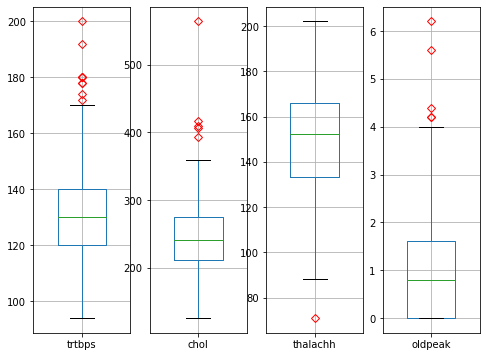

In [7]:
# plot box plots
def plot_box_plots():
    columns = ['trtbps', 'chol', 'thalachh', 'oldpeak']
    fig, ax = plt.subplots(nrows=1, ncols=len(columns), figsize=(8, 6))
    
    # box plot properties
    flierprops = {'markeredgecolor': 'red',  'marker': 'D', 'markersize': 6}
    boxplot_kwargs = dict({'flierprops': flierprops})
    
    # visualize IQR results with box plots
    for i, var in enumerate(columns):
        df.boxplot(column=var, ax=ax[i], vert=True, widths=0.5, **boxplot_kwargs)
    
    plt.show()
        
plot_box_plots()

In this case, we should not remove (drop) rows with errors because the entire dataset does not have much instances. We want to  keep as much information as possible for the validation process. All outliers in the predictors, except <code>thalachh</code>, are above the upper interquartile range. The outliers will be replaced by medians using conditional replacing (values greater then upper range). We can be easily obtain the upper whisker value with formula:

$$Q_3 + 1.5 \times IQR =  Q_3 + 1.5 \times (Q_3 - Q_1).$$

Analogously, the same operation will be repeated for <code>thalachh</code>. This feature needs defining the lower interquartile range:

$$Q_1 - 1.5 \times IQR =  Q_1 - 1.5 \times (Q_3 - Q_1).$$

In [8]:
# correct outliers
def correct_errors():
    columns = ['trtbps', 'chol', 'oldpeak']
    
    # quartiles
    for var in columns:
        Q1 = df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        maximum = Q3 + 1.5 * (Q3 - Q1)
        
        df.loc[df[var] > maximum, var] = df[var].median()
        
    # 'thalachh' column
    Q1 = df['thalachh'].quantile(0.25)
    Q3 = df['thalachh'].quantile(0.75)
    minimum = Q1 - 1.5 * (Q3 - Q1)
    
    df.loc[df['thalachh'] < minimum, 'thalachh'] = df['thalachh'].median()

correct_errors()

We finialized data cleansing and investigating the dataframe by handling noisy data. It is time to proceed and do more data mining.

### 3. Exploratory Data Analysis

We will perform further investigation on this dataset to discover more patterns, check assumptions and summary statistics with graphical representations. EDA allows planning the gathering of data to make data modelling more precise or more accurate. This stage can provide much more insights of the data.

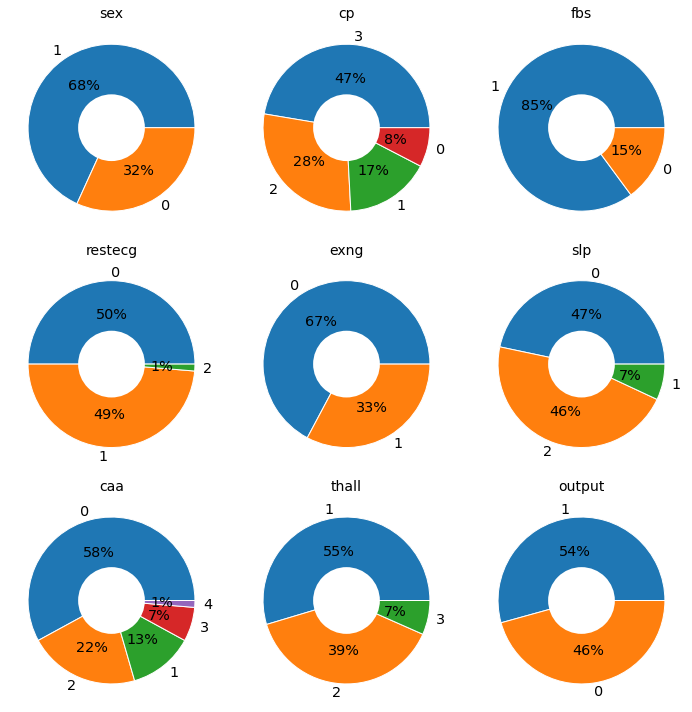

In [9]:
# donut plots for categorical data
def plot_donut_plots():

    plt.subplots(figsize=(10, 10))
    categ_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

    count = 1
    # donut plots for nominal predictors
    for var in categ_features:
        plt.subplot(3, 3, count)
        
        values = df[var].value_counts()
        labels = df[var].unique().tolist()
        wedge_props = {'linewidth': 1, 'edgecolor': 'w'}
        text_props = {'size': 'x-large'}
        plt.pie(values, labels=labels, autopct='%0.0f%%', wedgeprops=wedge_props, textprops=text_props)
        plt.title(label=var, size=14)
    
        center_circle = plt.Circle((0, 0), 0.4, fc='white')
        plt.gcf().gca().add_artist(center_circle)
        count += 1
    plt.tight_layout()
    plt.show()

plot_donut_plots()

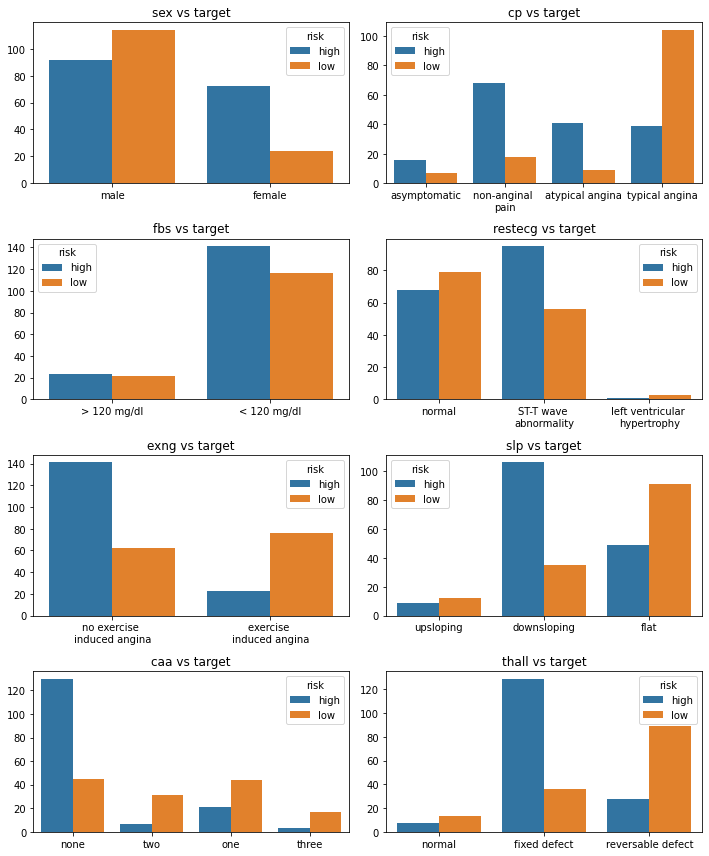

In [10]:
# countplots for categorical data vs target data
def plot_countplots():
    from seaborn import countplot
    
    # map the ordinal values
    lab_sex = df['sex'].map({0: 'female', 1: 'male'})
    lab_cp = df['cp'].map({0: 'typical angina', 1: 'atypical angina', 2: 'non-anginal \npain', 3: 'asymptomatic'})
    lab_fbs = df['fbs'].map({0: '< 120 mg/dl', 1: '> 120 mg/dl'})
    lab_restecg = df['restecg'].map({0: 'normal', 1: 'ST-T wave \nabnormality', 2: 'left ventricular \nhypertrophy'})
    lab_exng = df['exng'].map({0: 'no exercise \ninduced angina', 1: 'exercise \ninduced angina'})
    lab_slp = df['slp'].map({0: 'upsloping', 1: 'flat', 2: 'downsloping'})
    lab_caa = df['caa'].map({0: 'none', 1: 'one', 2: 'two', 3: 'three'})
    lab_thall = df['thall'].map({1: 'normal', 2: 'fixed defect', 3: 'reversable defect'})
    lab_target = df['output'].map({0: 'low', 1: 'high'})

    plt.subplots(figsize=(10, 12))
    labels = [lab_sex, lab_cp, lab_fbs, lab_restecg, lab_exng, lab_slp, lab_caa, lab_thall]
    categ_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

    count = 1
    # countplots for nominal predictors
    for lab, var in zip(labels, categ_features):
        plt.subplot(4, 2, count)
        countplot(data=df, x=lab, hue=lab_target)
        plt.title(var + ' vs target')
        plt.xlabel(None)
        plt.ylabel(None)
        plt.legend(title='risk')
        count += 1
    plt.tight_layout()
    plt.show()
    
plot_countplots()

* The dataset has more male respondents. The female population is more prone to heart failure.
* Any other chest pains (except typical angina) are associated with heart disease. Chest pain is a major symptom of this health dysfunction.
* People with noted fasting blood sugar lower then 120 mg/dl are statistically more exposed to heart disease.
* The graph with resting electrocardiographic results shows that respondents with wave abnormality have higher risk of heart failure. We can see that respondents with normal results are numerous in this dataset (50%), but still are less exposed to experience heart failure.
* Patients who experience angina without exercise are more liable to heart disease.
* Patients with downsloping peak exercise ST segment are more vulnerale to heart failure which shouldn't come in surprise. A flat slope is still more prone then a upsloping.
* People with no major vessels have definately higher risk of heart disease.
* Respondents with abnormal thallium stress test results are more significantly vulnerable to experience heart failure.

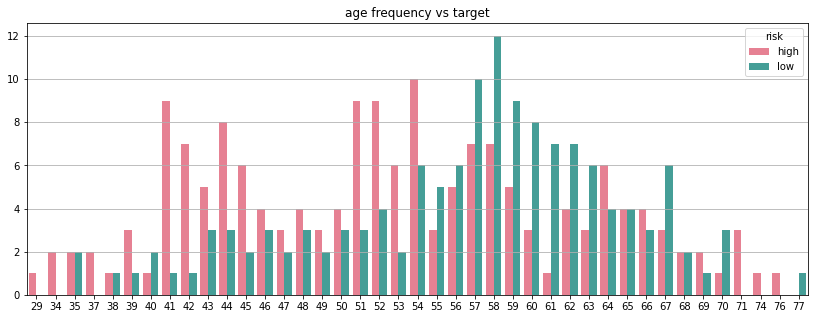

In [11]:
# plot age frequency vs target data
def age_frequency_target():
    from seaborn import countplot

    lab_target = df['output'].map({0: 'low', 1: 'high'})
    lab_sex = df['sex'].map({0: 'female', 1: 'male'})
    
    plt.figure(figsize=(14, 5))
    countplot(x='age', hue=lab_target, data=df, palette='husl')
    plt.title('age frequency vs target')
    plt.xlabel(None)
    plt.ylabel(None)
    plt.grid(axis='y')
    plt.legend(loc='upper right', title='risk')
    plt.show()
    
age_frequency_target()

Patients in their 40s and 50s are clearly more liable to get heart failure. From age 63 the chance of experiencing heart disease is much more even.

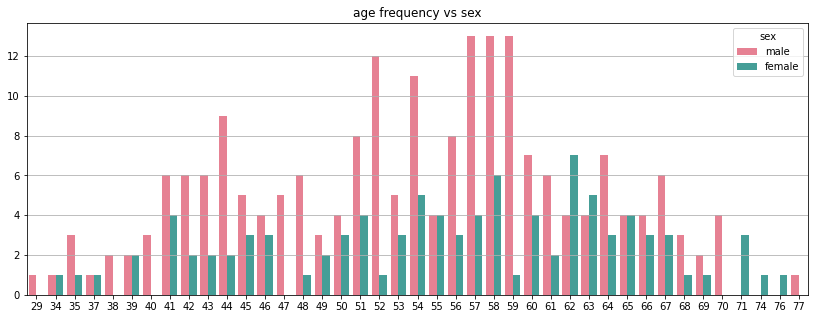

In [12]:
# plot age frequency vs sex
def age_frequency_sex():
    from seaborn import countplot

    lab_target = df['output'].map({0: 'low', 1: 'high'})
    lab_sex = df['sex'].map({0: 'female', 1: 'male'})
    
    plt.figure(figsize=(14, 5))
    countplot(x='age', hue=lab_sex, data=df, palette='husl')
    plt.title('age frequency vs sex')
    plt.xlabel(None)
    plt.ylabel(None)
    plt.grid(axis='y')
    plt.legend(loc='upper right', title='sex')
    plt.show()
    
age_frequency_sex()

This plot shows again that the dataset contains more male respondents then female for most ages. The most for both men and women are aged from 50 to 60.

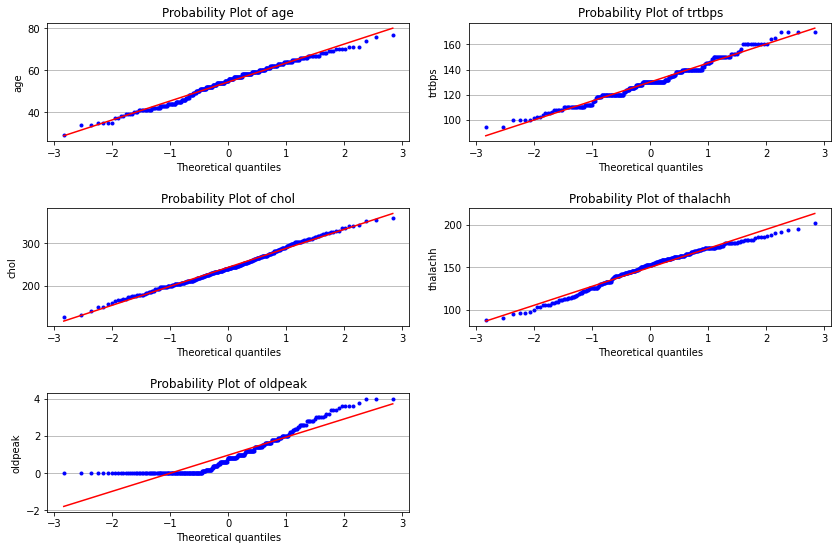

In [13]:
# probability plots for continuous data
def plot_probability_plots():
    from scipy.stats import probplot

    plt.subplots(figsize=(12, 8))
    # list of continuous features
    columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
    
    count = 1
    # probability plots for continuous predictors
    for var in columns:
        ax = plt.subplot(3, 2, count)
        probplot(df[var].values, dist='norm', plot=ax, fit=True)
        ax.get_lines()[0].set_markersize(3)
        plt.title('Probability Plot of {}'.format(var))
        plt.tight_layout(pad=2)
        plt.ylabel(var)
        plt.grid(axis='y')
        count += 1
    plt.show()

plot_probability_plots()

Ideally the plotted points should line up along the red lines showing the distribution of the data. The residuals of the continuous variables follow a distribution similar to normal, except <code>oldpeak</code>.

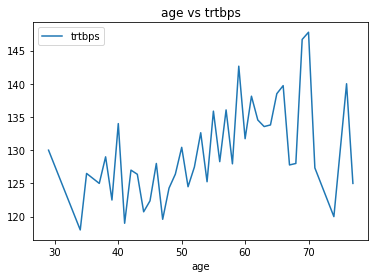

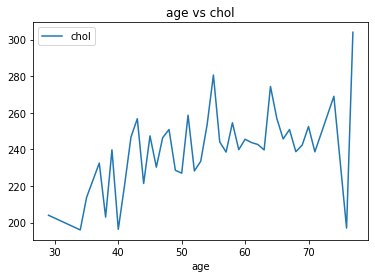

In [14]:
# plot resting blood pressure vs age
def trtbps_plot():
    pd.pivot_table(df, index='age', values='trtbps', aggfunc='mean').plot(title='age vs trtbps')
    plt.show()

# plot cholesterol vs age
def chol_plot():
    pd.pivot_table(df, index='age', values='chol', aggfunc='mean').plot(title='age vs chol')
    plt.show()
    
trtbps_plot()
chol_plot()

Both resting blood pressure and cholesterol tend to increase the older the respondents are.

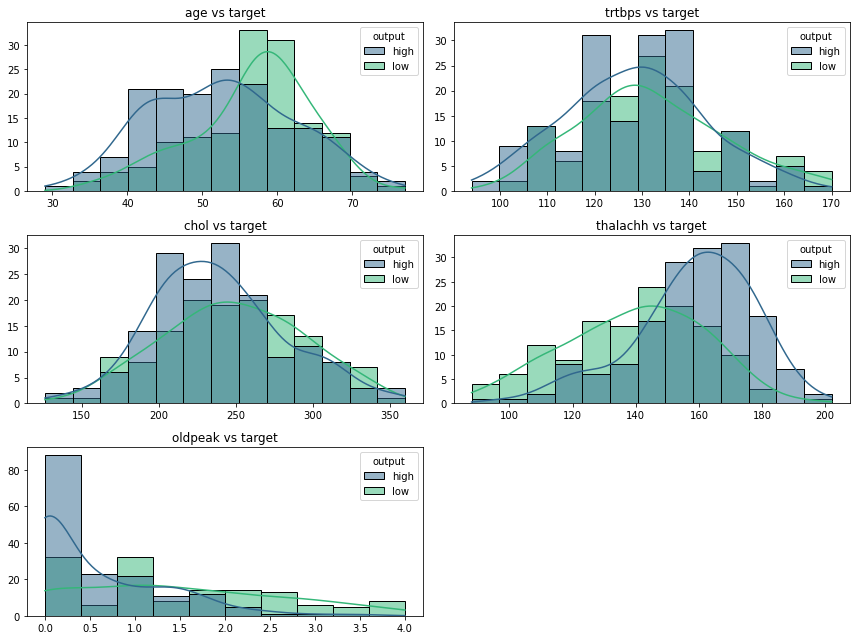

In [15]:
# plot bivariate histograms for continuous data
def plot_histograms():
    from seaborn import histplot
    
    lab_target = df['output'].map({0: 'low', 1: 'high'})
    contin_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
    plt.subplots(figsize=(12, 9))
    
    count = 1
    for var in contin_features:
        plt.subplot(3, 2, count)
        histplot(data=df, x=var, hue=lab_target, kde=True, stat='count', palette='viridis')
        plt.title(var + ' vs target')
        plt.xlabel(None)
        plt.ylabel(None)
        count += 1
    plt.tight_layout()    
    plt.show()
    
plot_histograms()

* There is a correlation between age and heart failure. Most patients are exposed to heart desease from age 45 to 55.
* Resting blood pressure is not a determinant of heart disease.
* Cholesterol level slightly affects heart failure. It is not a major factor.
* Respondents with higher heart rate scores are more prone to this health condition, mostly in range [150, 180].
* The old peak (ST depression) is also a good predictor for our classifying problem. It is clearly obvious that lower rates determine higher risk of heart failure.

### 4. Relationship Exploration for Nominal Data

This exploration can be performed visually by plotting box plots. We can also evaluate correlations using the chi square statistical test ($\chi^2$).

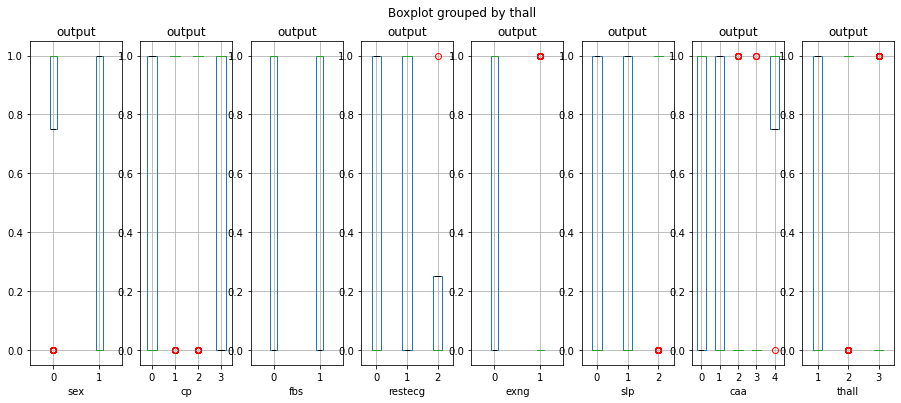

In [16]:
# plot box plots
def plot_box_plots():
    columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
    fig, ax = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 6))
    
    # box plot properties
    flierprops = {'markeredgecolor': 'red'}
    boxplot_kwargs = dict({'flierprops': flierprops})
    
    # generate box plots for each categorical feature vs target
    for i, var in enumerate(columns):
        df.boxplot(column='output', ax=ax[i], by=var, vert=True, **boxplot_kwargs)
    plt.show()
        
plot_box_plots()

The fasting blood sugar column seems to not be correlated with target labels. We will check this and additionally evaluate our statement by performing the chi square test which is similar to the ANOVA test.

Often during classification machine learning we need to measure the correlation between two nominal variables. Our target data also contains labels. When both features are categorical, then the strength of the relationship between them can be measured with chi square test of independence. It determines whether there is a statistically significant difference between the expected frequencies and the observed frequencies in one or more categories of a contingency table. In other words, the $\chi^2$ test helps figure out if we need to reject the null hypothesis or accept the alternate hypothesis.

The null hypothesis ($H_0$) of this test is that the data is not significant. If the p-value of the test is less then the significance level (0.05) then we can reject the null hypothesis and infer that the predictor is indeed meaningless. So, if p-value is greater then 0.05 we will need to find the order of differencing.

In [17]:
# check for statistical relationships with categorical predictors
def chi2_test():
    from scipy.stats import chi2_contingency

    categ_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
    
    print('Chi-Squared Test Results:\n')
    for var in categ_features:
        cross_tab = pd.crosstab(index=df['output'], columns=df[var])
        chi2_results = chi2_contingency(cross_tab)
        
        # if the p-value is < 0.05, that means we reject H0
        if (chi2_results[1] < 0.05):
            print(var, 'is correlated with target | p-value =', chi2_results[1])
        else:
            print(var, 'is not correlated with target | p-value =', chi2_results[1])

chi2_test()

Chi-Squared Test Results:

sex is correlated with target | p-value = 1.5508552054949547e-06
cp is correlated with target | p-value = 1.8926838351935918e-17
fbs is not correlated with target | p-value = 0.7611374700928197
restecg is correlated with target | p-value = 0.007713053269318978
exng is correlated with target | p-value = 9.556466486179178e-14
slp is correlated with target | p-value = 6.5777827609179e-11
caa is correlated with target | p-value = 3.771038067427657e-15
thall is correlated with target | p-value = 4.686586647393888e-19


Indeed the chi-squared test confirms our conclusion from previous box plots. We will drop the <code>fbs</code> predictor for our further classification models.

### 5. Relationship Exploration for Continuous Data

We will start this evaluation by plotting scatter graphs with fitted trend lines. We will set the fitted lines with first order functions.

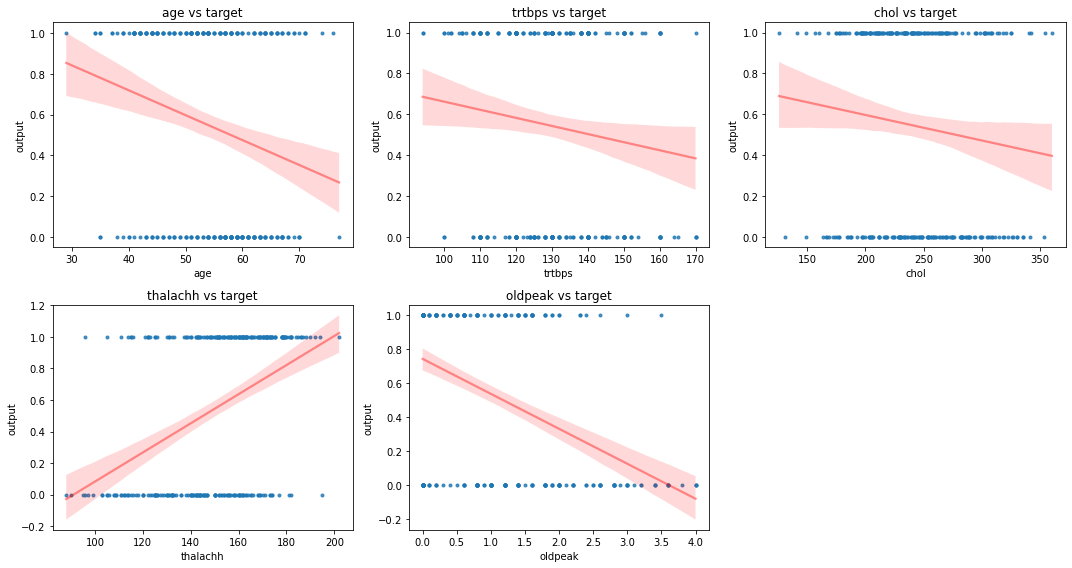

In [18]:
# plot reg plots and fit trend lines
def plot_reg_plots():
    from seaborn import regplot

    contin_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
    plt.subplots(figsize=(15, 8))
    
    count = 1
    for var in contin_features:
        plt.subplot(2, 3, count)
        regplot(data=df, x=var, y='output', marker='.', line_kws={'color': 'red', 'alpha': 0.4}, order=1, truncate=True)
        plt.title(var + ' vs target')
        count += 1
    plt.tight_layout()
    plt.show()

plot_reg_plots()

Based on these plots we can get a better idea about the predictor and it's relationship with target column - if it will be useful or not. We confirm this by looking at the correlation value. There are week trends for <code>trtbps</code> and <code>chol</code> columns. The highest relationships are for <code>thalachh</code> and <code>oldpeak</code>.

We will also visualize trends with a heatmap containing linear correlation values between numerical features.

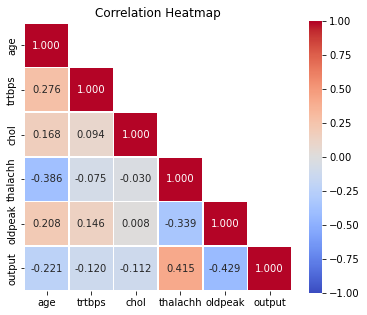

In [19]:
# plot heatmap
def plot_heatmap():
    from seaborn import heatmap
    
    columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']
    
    # define correlation matrix
    corr_df = df[columns].corr(method='pearson')
    df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(np.bool))
    
    # plot heatmap
    plt.figure(figsize=(6, 5))
    heatmap(data=df_lt, annot=True, square=True, cbar=True, vmin=-1, vmax=1, linewidths=.5, fmt='.3f', cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

plot_heatmap()

The last row of the matrix displays each numerical characteristic's Pearson correlation with the target data. Overall, the correlation values do not indicate strong relationships (regardless of the sign). Among all continuous features, we will keep for data modelling: <code>age</code>, <code>thalachh</code> and <code>oldpeak</code>.

### 6. Normalizing and Splitting Data

We will normalize the data by rescaling each feature. The method we will implement will transform values in a range between [0, 1]. The transformation shifts the values as given:

$$X_i' = \frac{X_i - min(X)}{max(X) - min(X)},$$

where $X_i$ is the original value, $min(X)$ the minimum value in feature range, and $max(X)$ the maximum value.

Next, we will partion our dataset into training and validation sets and accept a 80:20 ratio. Our $X$ feature array we will contain variables chosen previously relationship exploration:
* categorical data - <code>sex</code>, <code>cp</code>, <code>restecg</code>, <code>exng</code>, <code>slp</code>, <code>caa</code>, <code>thall</code>;
* continuous data - <code>age</code>, <code>thalachh</code> and <code>oldpeak</code>.

In [20]:
# normalize and split data
def normalize_split_data():
    from sklearn.model_selection import train_test_split
    
    # features for X array
    features = df.drop(['fbs', 'trtbps', 'chol', 'output'], axis=1)
    
    global X, y, X_train, X_test, y_train, y_test
    
    # rescale data - feature array X
    X = (features - np.min(features)) / (np.max(features) - np.min(features)).values
    # target data y
    y = df['output'].values
    
    # split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=0)
    
    print('Train Data:', np.size(X_train, 0), '\nTest Data:', np.size(X_test, 0))

normalize_split_data()

Train Data: 241 
Test Data: 61


The data is ready for further machine learning. We will explore different classifiers to find which algorithm has the best accuracy score. We will implement these given models:
* logistic regression,
* k-nearest neighbors,
* support vector machines,
* random forest ensemble,
* Gaussian Naïve Bayes,
* gradient boosting ensemble,
* stochastic gradient descent,
* multi-layer perceptron.

### 7. Developing Classifiers

#### 7a. Logistic Regression

In [21]:
# find optimal parameters for logistic regression
def tuning_lr():
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import GridSearchCV
    
    # initializing regressor
    lr = LogisticRegression()
    
    # grid of hyperparameters for tuning
    # setting penalty='none' will ignore the C and l1_ratio parameters
    parameters = {'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                  'max_iter': [50, 100, 200, 400, 700, 800, 1000],
                  'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

    # tuning process
    tuning_mod = GridSearchCV(lr, param_grid=parameters, cv=5, verbose=1)
    tuning_mod.fit(X_train, y_train)
    
    print('\n#### Best Parameters ####')
    print(tuning_mod.best_params_)
    
tuning_lr()

Fitting 5 folds for each of 140 candidates, totalling 700 fits

#### Best Parameters ####
{'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear'}


In [22]:
# initiate dictionaries with: accuracies and missed samples
# initiate list of models
accuracies = {}
missed_samples = {}
classifiers = []

def lr_classifier():
    from sklearn.linear_model import LogisticRegression

    lr = LogisticRegression(penalty='l2', max_iter=50, solver='liblinear')
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    acc = lr.score(X_test, y_test) * 100
    sam = (y_test != pred).sum()
    
    accuracies['Logistic Regression'] = acc
    missed_samples['Logistic Regression'] = sam
    classifiers.append(lr)
    
    print('Accuracy: {:.2f}%'.format(acc))
    print('Missed Samples:', sam)
    
lr_classifier()

Accuracy: 88.52%
Missed Samples: 7


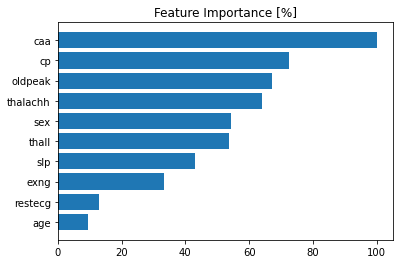

In [23]:
# plot feature importance for logistic regression
def lr_feature_importance():
    feature_importance = abs(classifiers[0].coef_[0])
    feature_importance = 100 * (feature_importance / feature_importance.max())
    indices = np.argsort(feature_importance)
    pos = np.arange(indices.shape[0])
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.barh(pos, feature_importance[indices], align='center')
    ax.set_yticks(pos)
    ax.set_yticklabels(np.array(X.columns)[indices])
    ax.set_title('Feature Importance [%]')
    plt.show()
    
lr_feature_importance()

#### 7b. k-Nearest Neighbors

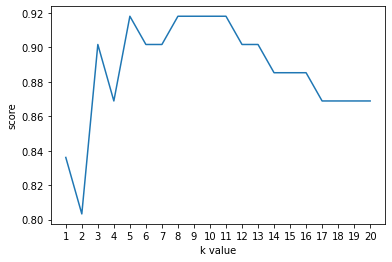

Maximum Score is For k = 5


In [24]:
# find optimal number of neighbors
def knn_tuning():
    from sklearn.neighbors import KNeighborsClassifier
    
    # calculate scores for k values between 1 and 20
    score_list = []
    for i in range(1, 21):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        score_list.append(knn.score(X_test, y_test))
    
    # plot results
    plt.plot(range(1, 21), score_list)
    plt.xticks(np.arange(1, 21, 1))
    plt.xlabel('k value')
    plt.ylabel('score')
    plt.show()
    
    k = score_list.index(max(score_list)) + 1
    print('Maximum Score is For k =', k)
    
knn_tuning()

In [25]:
def knn_classifier():
    from sklearn.neighbors import KNeighborsClassifier

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    acc = knn.score(X_test, y_test) * 100
    sam = (y_test != pred).sum()
    
    accuracies['kNN'] = acc
    missed_samples['kNN'] = sam
    classifiers.append(knn)
    
    print('Accuracy: {:.2f}%'.format(acc))
    print('Missed Samples:', sam)
    
knn_classifier()

Accuracy: 91.80%
Missed Samples: 5


#### 7c. Support Vector Machines

In [26]:
# find optimal parameters for support vector machine
def tuning_svc():
    from sklearn.svm import SVC
    from sklearn.model_selection import GridSearchCV
    
    # initializing regressor
    # probability must be True for 'predict_proba(X)' to work further
    svc = SVC(random_state=0, probability=True)
    
    # grid of hyperparameters for tuning
    parameters = {'C': [0.01, 1, 10, 100, 1000], 
                  'gamma': [1.0, 0.1, 0.01, 0.001, 0.0001],
                  'kernel': ['rbf', 'poly', 'linear'],
                  'degree': [0, 1, 2, 3, 4, 5, 6]}

    # tuning process
    tuning_mod = GridSearchCV(svc, param_grid=parameters, cv=5, verbose=1)
    tuning_mod.fit(X_train, y_train)
    
    print('\n#### Best Parameters ####')
    print(tuning_mod.best_params_)
    
tuning_svc()

Fitting 5 folds for each of 525 candidates, totalling 2625 fits

#### Best Parameters ####
{'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}


In [27]:
def svc_classifier():
    from sklearn.svm import SVC

    svc = SVC(C=10, degree=2, gamma=0.1, kernel='poly', random_state=0, probability=True)
    svc.fit(X_train, y_train)
    pred = svc.predict(X_test)
    acc = svc.score(X_test, y_test) * 100
    sam = (y_test != pred).sum()
    
    accuracies['SVM'] = acc
    missed_samples['SVM'] = sam
    classifiers.append(svc)
    
    print('Accuracy: {:.2f}%'.format(acc))
    print('Missed Samples:', sam)
    
svc_classifier()

Accuracy: 88.52%
Missed Samples: 7


#### 7d. Random Forest Ensemble

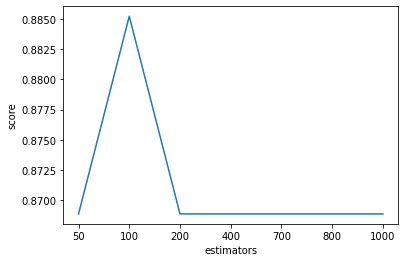

Maximum Score is For 100 Trees


In [28]:
# find optimal number of estimators
def rf_tuning():
    from sklearn.ensemble import RandomForestClassifier
    
    # calculate scores for estimators between 50 and 1000
    score_list = []
    trees = [50, 100, 200, 400, 700, 800, 1000]
    
    for i in trees:
        rf = RandomForestClassifier(n_estimators=i, random_state=0)
        rf.fit(X_train, y_train)
        score_list.append(rf.score(X_test, y_test))
    
    # plot results
    fig, ax = plt.subplots()
    plt.plot(range(1, 8), score_list)
    plt.xticks(np.arange(1, 8, 1))
    ax.set_xticklabels(trees)
    plt.xlabel('estimators')
    plt.ylabel('score')
    plt.show()
    
    n = score_list.index(max(score_list))
    print('Maximum Score is For {} Trees'.format(trees[n]))
    
rf_tuning()

In [29]:
def rf_classifier():
    from sklearn.ensemble import RandomForestClassifier

    rf = RandomForestClassifier(n_estimators=100, random_state=0)
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    acc = rf.score(X_test, y_test) * 100
    sam = (y_test != pred).sum()
    
    accuracies['Random Forest'] = acc
    missed_samples['Random Forest'] = sam
    classifiers.append(rf)

    print('Accuracy: {:.2f}%'.format(acc))
    print('Missed Samples:', sam)
    
rf_classifier()

Accuracy: 88.52%
Missed Samples: 7


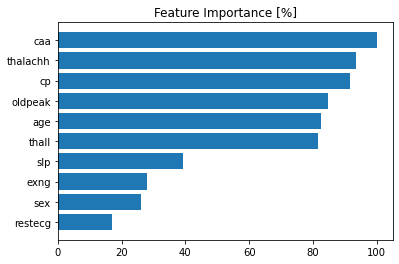

In [30]:
# plot feature importance for random forest
def rf_feature_importance():
    feature_importance = abs(classifiers[3].feature_importances_)
    feature_importance = 100 * (feature_importance / feature_importance.max())
    indices = np.argsort(feature_importance)
    pos = np.arange(indices.shape[0])
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.barh(pos, feature_importance[indices], align='center')
    ax.set_yticks(pos)
    ax.set_yticklabels(np.array(X.columns)[indices])
    ax.set_title('Feature Importance [%]')
    plt.show()
    
rf_feature_importance()

#### 7e. Gaussian Naïve Bayes

In [31]:
# find optimal parameter for Naive Bayes
def tuning_nb():
    from sklearn.naive_bayes import GaussianNB
    from sklearn.model_selection import GridSearchCV
    
    # initializing regressor
    nb = GaussianNB()
    
    # grid of hyperparameters for tuning
    parameters = {'var_smoothing': np.logspace(start=0, stop=-9, num=100)}

    # tuning process
    tuning_mod = GridSearchCV(nb, param_grid=parameters, cv=5, verbose=1)
    tuning_mod.fit(X_train, y_train)
    
    print('\n#### Best Parameters ####')
    print(tuning_mod.best_params_)
    
tuning_nb()

Fitting 5 folds for each of 100 candidates, totalling 500 fits

#### Best Parameters ####
{'var_smoothing': 0.02848035868435802}


In [32]:
def nb_classifier():
    from sklearn.naive_bayes import GaussianNB

    nb = GaussianNB(var_smoothing=0.028480)
    nb.fit(X_train, y_train)
    pred = nb.predict(X_test)
    acc = nb.score(X_test, y_test) * 100
    sam = (y_test != pred).sum()
    
    accuracies['Naïve Bayes'] = acc
    missed_samples['Naïve Bayes'] = sam
    classifiers.append(nb)
    
    print('Accuracy: {:.2f}%'.format(acc))
    print('Missed Samples:', sam)
    
nb_classifier()

Accuracy: 85.25%
Missed Samples: 9


#### 7f. Stochastic Gradient Descent

In [33]:
# find optimal parameters for stochastic gradient descent
def tuning_sgd():
    from sklearn.linear_model import SGDClassifier
    from sklearn.model_selection import GridSearchCV
    
    # initializing regressor
    sgd = SGDClassifier(random_state=0)
    
    # grid of hyperparameters for tuning
    parameters = {'penalty': ['l1', 'l2', 'elasticnet'], 
                  'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
                  'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']}

    # tuning process
    tuning_mod = GridSearchCV(sgd, param_grid=parameters, cv=5, verbose=1)
    tuning_mod.fit(X_train, y_train)
    
    print('\n#### Best Parameters ####')
    print(tuning_mod.best_params_)
    
tuning_sgd()

Fitting 5 folds for each of 480 candidates, totalling 2400 fits

#### Best Parameters ####
{'alpha': 0.01, 'learning_rate': 'optimal', 'loss': 'log', 'penalty': 'l2'}


In [34]:
def sgd_classifier():
    from sklearn.linear_model import SGDClassifier

    sgd = SGDClassifier(alpha=0.01, learning_rate='optimal', loss='log', penalty='l2', random_state=0)
    sgd.fit(X_train, y_train)
    pred = sgd.predict(X_test)
    acc = sgd.score(X_test, y_test) * 100
    sam = (y_test != pred).sum()
    
    accuracies['SGD'] = acc
    missed_samples['SGD'] = sam
    classifiers.append(sgd)
    
    print('Accuracy: {:.2f}%'.format(acc))
    print('Missed Samples:', sam)
    
sgd_classifier()

Accuracy: 88.52%
Missed Samples: 7


#### 7g. Gradient Boosting Ensemble

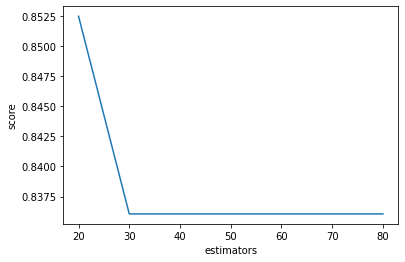

Maximum Score is For 20 Trees


In [35]:
# find optimal number of estimators
def gb_tuning():
    from sklearn.ensemble import GradientBoostingClassifier
    
    # calculate scores for estimators between 20 and 80
    score_list = []
    trees = range(20, 81, 10)
    
    for i in trees:
        gb = GradientBoostingClassifier(n_estimators=i, random_state=0)
        gb.fit(X_train, y_train)
        score_list.append(gb.score(X_test, y_test))
    
    # plot results
    fig, ax = plt.subplots()
    plt.plot(range(1, 8), score_list)
    plt.xticks(np.arange(1, 8, 1))
    ax.set_xticklabels(trees)
    plt.xlabel('estimators')
    plt.ylabel('score')
    plt.show()
    
    n = score_list.index(max(score_list))
    print('Maximum Score is For {} Trees'.format(trees[n]))
    
gb_tuning()

In [36]:
def gb_classifier():
    from sklearn.ensemble import GradientBoostingClassifier

    gb = GradientBoostingClassifier(n_estimators=20, random_state=0)
    gb.fit(X_train, y_train)
    pred = gb.predict(X_test)
    acc = gb.score(X_test, y_test) * 100
    sam = (y_test != pred).sum()
    
    accuracies['Gradient Boosting'] = acc
    missed_samples['Gradient Boosting'] = sam
    classifiers.append(gb)
    
    print('Accuracy: {:.2f}%'.format(acc))
    print('Missed Samples:', sam)
    
gb_classifier()

Accuracy: 85.25%
Missed Samples: 9


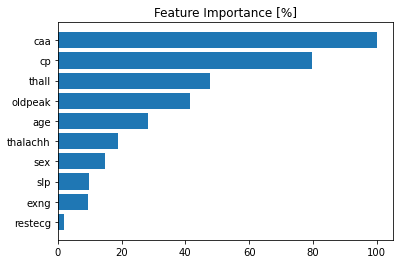

In [37]:
# plot feature importance for gradient boosting
def gb_feature_importance():
    feature_importance = abs(classifiers[6].feature_importances_)
    feature_importance = 100 * (feature_importance / feature_importance.max())
    indices = np.argsort(feature_importance)
    pos = np.arange(indices.shape[0])
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.barh(pos, feature_importance[indices], align='center')
    ax.set_yticks(pos)
    ax.set_yticklabels(np.array(X.columns)[indices])
    ax.set_title('Feature Importance [%]')
    plt.show()
    
gb_feature_importance()

#### 7h. Multi-Layer Perceptron

In [38]:
# find optimal parameters for multi-layer perceptron
def tuning_mlp():
    from sklearn.neural_network import MLPClassifier
    from sklearn.model_selection import GridSearchCV
    
    # initializing regressor
    mlp = MLPClassifier(max_iter=100, random_state=0)
    # grid of hyperparameters for tuning
    parameters = {'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)], 
                  'alpha': [0.0001, 0.01, 0.05],
                  'solver': ['sgd', 'adam'],
                  'activation': ['tanh', 'logistic', 'relu'],
                  'learning_rate': ['constant','adaptive']}

    # tuning process
    tuning_mod = GridSearchCV(mlp, param_grid=parameters, cv=5, verbose=1)
    tuning_mod.fit(X_train, y_train)
    
    print('\n#### Best Parameters ####')
    print(tuning_mod.best_params_)
    
tuning_mlp()

Fitting 5 folds for each of 108 candidates, totalling 540 fits

#### Best Parameters ####
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}


In [39]:
def mlp_classifier():
    from sklearn.neural_network import MLPClassifier

    mlp = MLPClassifier(activation='tanh', alpha= 0.0001, hidden_layer_sizes=(100,),
                        learning_rate='constant', solver='adam', max_iter=100, random_state=0)
    mlp.fit(X_train, y_train)
    pred = mlp.predict(X_test)
    acc = mlp.score(X_test, y_test) * 100
    sam = (y_test != pred).sum()
    
    accuracies['MLP'] = acc
    missed_samples['MLP'] = sam
    classifiers.append(mlp)
    
    print('Accuracy: {:.2f}%'.format(acc))
    print('Missed Samples:', sam)
    
mlp_classifier()

Accuracy: 88.52%
Missed Samples: 7


### 8. Evaluating and Visualizing Model Performance

We trained all classifiers with success. Each model was preceded by finding optimal hyperparameters for higher performance. We will evaluate their performances and usefulness, generate plots to compare them and choose the best algorithm.

#### 8a. Accuracies

We will start by displaying accuracies for each classifier. Next, we will print missed samples in tabular form.

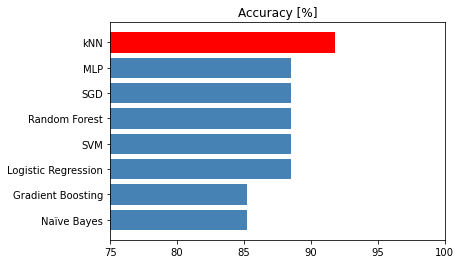

In [40]:
# plot achieved accuracies for each classifier
def plot_accuracies():
    # sort dictionary descending by values
    acc_sorted = sorted(accuracies.items(), key=lambda x: x[1], reverse=False)
    
    # extract values into lists
    acc_values = [x[1] for x in acc_sorted]
    acc_keys = [x[0] for x in acc_sorted]
    
    colors = ['red' if (bar == max(acc_values)) else 'steelblue' for bar in list(acc_values)]
    plt.barh(acc_keys, acc_values, align='center', color=colors)
    plt.title('Accuracy [%]')
    plt.xlim([75, 100])
    plt.show()
    
plot_accuracies()

In [41]:
# display missed samples for each classifier
def summary_missed_samples():
    df = pd.DataFrame(data=missed_samples.items(), columns=['Classifier', 'Missed Samples'])
    return df.sort_values(by='Missed Samples', ascending=True).style.hide_index()

summary_missed_samples()

Classifier,Missed Samples
kNN,5
Logistic Regression,7
SVM,7
Random Forest,7
SGD,7
MLP,7
Naïve Bayes,9
Gradient Boosting,9


In terms of accuracy the k-nearest neighbors performed the best. The worst performance is for gradient boosting ensemble and Gaussian Naïve Bayes.

#### 8b. Confusion Matrices

We can summarize assigned class samples with confusion matrices. Each row of the table represents a class while each column represents the instances in a predicted class, or vice versa.

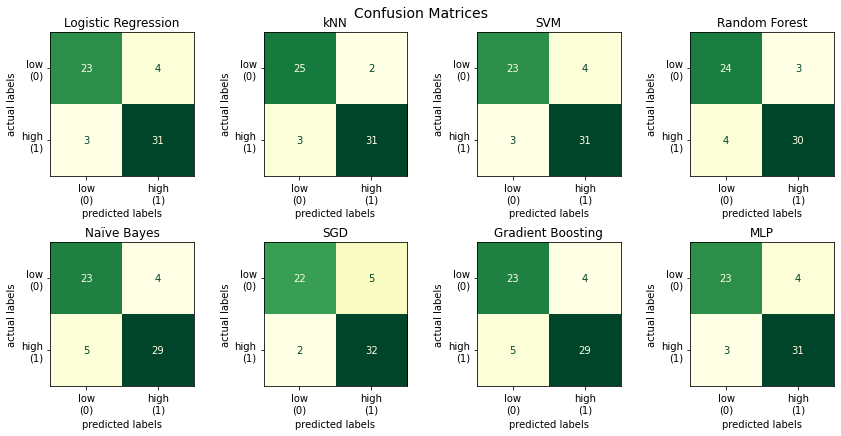

In [42]:
# plot confusion matrices for each classifier
def plot_confusion_matrices():
    from sklearn.metrics import plot_confusion_matrix    
    
    # extract labels into list
    clf_list = [x[0] for x in accuracies.items()]
    
    # fit data
    for clf in classifiers:
        clf.fit(X_train, y_train)

    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))
    fig.suptitle('Confusion Matrices', size=14, y=1.0)
    
    ######### plot confusion matrices
    for clf, ax, lab in zip(classifiers, axes.flatten(), clf_list):  
        plot_confusion_matrix(clf, X_test, y_test, ax=ax, cmap='YlGn', colorbar=False)
        ax.title.set_text(lab)
        ax.set_xlabel('predicted labels')
        ax.set_ylabel('actual labels')   
        ax.xaxis.set_ticklabels(['low\n(0)', 'high\n(1)'])
        ax.yaxis.set_ticklabels(['low\n(0)', 'high\n(1)'])
    plt.tight_layout()
    plt.show()
         
plot_confusion_matrices()

#### 8c. Decision Boundaries

A popular diagnostic for understanding the decisions made by a classification algorithm is the decision surface. This is a plot that shows how a trained machine learning algorithm predicts a coarse grid across the input feature space. It is a great way to visually evaluate how good our machine learning model is. We will retrain models with new data and plot decision boundaries with the <code>Mlxtend</code> library.

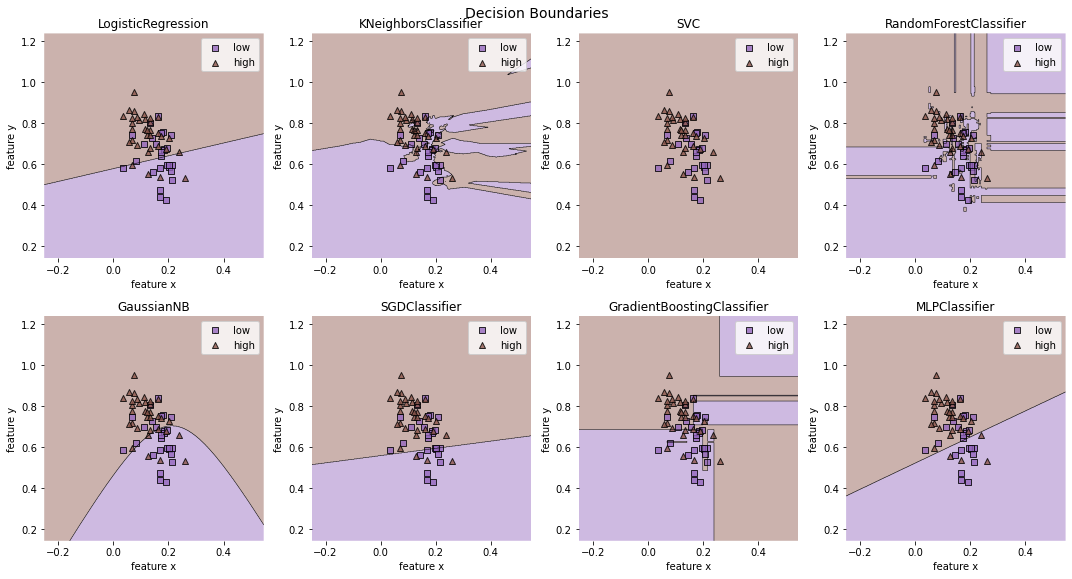

In [43]:
# plot decision regions for each classifier
def plot_decision_boundaries():
    from sklearn.model_selection import train_test_split
    import matplotlib.gridspec as gridspec
    from mlxtend.plotting import plot_decision_regions
    
    # separate new data - 'age', 'thalachh'
    features = df.iloc[:, [0, 7]].values
    # target data y
    y = df.iloc[:, -1].values
    
    # rescale data
    X = (features - np.min(features)) / (np.max(features) - np.min(features))

    # split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=0)
    
    gs = gridspec.GridSpec(nrows=2, ncols=4)
    fig = plt.figure(figsize=(15, 8))  
    fig.suptitle('Decision Boundaries', size=14, y=1.0)
     
    # create grid list for layout - 2 rows x 4 cols
    grd_list = []
    for i in range(0, 2): 
        for j in range(0, 4):
            grd_list.append((i, j))
    
    ######### plot decision regions
    for clf, grd in zip(classifiers, grd_list):  
        clf.fit(X_train, y_train)
        ax = plt.subplot(gs[grd[0], grd[1]])
        fig = plot_decision_regions(X_test, y_test, clf=clf, legend=2, zoom_factor=3.5, colors='#9467bd,#8c564b,#e377c2,')
        
        plt.title(type(clf).__name__)
        plt.xlabel('feature x')
        plt.ylabel('feature y')
        l = plt.legend(loc='best')
        l.get_texts()[0].set_text('low')
        l.get_texts()[1].set_text('high')
    plt.tight_layout()
    plt.show()

plot_decision_boundaries()

Most models set very simple boundaries with splines or lines. The most complex borders are for the kNN algorithm and the ones using decision trees (random forest and gradient boosting). The support vector machines plot does not display any borders. They might be beyond the range.

#### 8d. ROC Curves

ROC Curves (receiving operating characteristic curves) are another graphical measure for evaluating classifiers. They represent the true positive and false positive rates for every probability threshold of a binary classifier.

We will first plot the curves separately and then compare them in two graphs. The higher the curve is over the random classifier, the better.

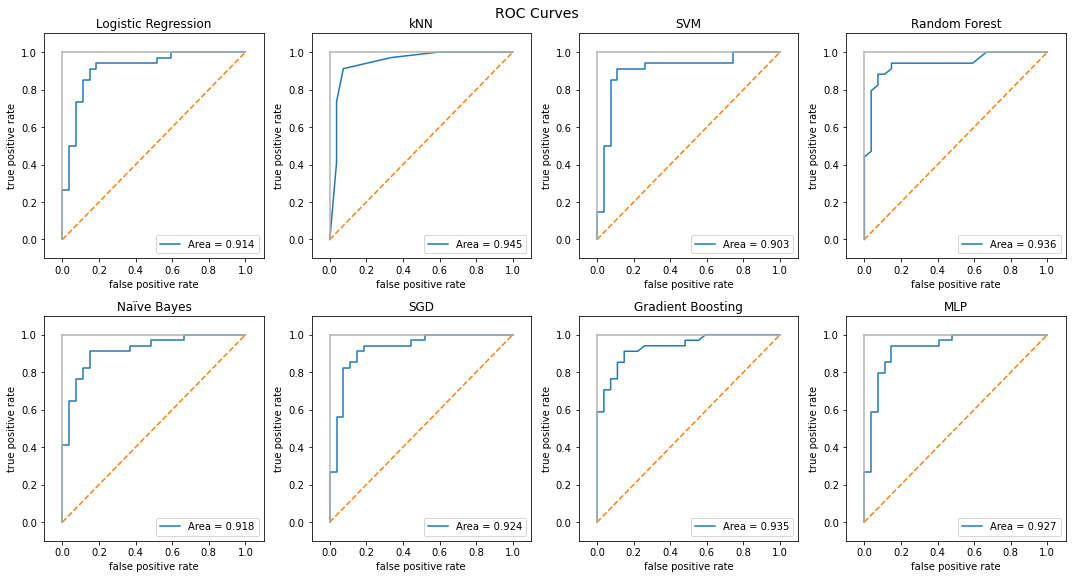

In [44]:
# plot ROC curves for each classifier
def separate_roc_curves():
    import matplotlib.gridspec as gridspec
    from sklearn.metrics import roc_curve, auc
    
    # extract labels into list
    clf_list = [x[0] for x in accuracies.items()]
    
    gs = gridspec.GridSpec(nrows=2, ncols=4)
    fig = plt.figure(figsize=(15, 8))  
    fig.suptitle('ROC Curves', size=14, y=1.0)
     
    # create grid list for layout - 2 rows x 4 cols
    grd_list = []
    for i in range(0, 2): 
        for j in range(0, 4):
            grd_list.append((i, j))
    
    ######### plot ROC curves
    for clf, grd, lab in zip(classifiers, grd_list, clf_list):
        clf.fit(X_train, y_train)
        y_proba = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, threshold = roc_curve(y_test, y_proba)
        
        ax = plt.subplot(gs[grd[0], grd[1]])
        fig_roc = plt.plot(fpr, tpr, label='Area = {:.3f}'.format(auc(fpr, tpr)))
        fig_line = plt.plot([0,1], [0, 1], linestyle='--')
        plt.plot([0, 0], [1, 0] , c='0.7')
        plt.plot([1, 1] , c='0.7')
        
        plt.title(lab)
        plt.xlabel('false positive rate')
        plt.ylabel('true positive rate')
        plt.xlim([-0.1, 1.1])
        plt.ylim([-0.1, 1.1])
        plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()
    
separate_roc_curves()

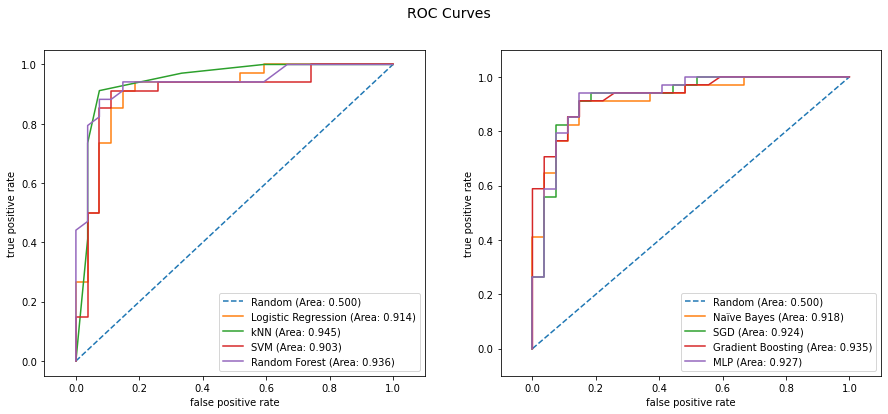

In [45]:
# plot ROC curves for each classifier
def plot_roc_curves():
    from sklearn.metrics import roc_curve, auc
    
    # extract labels into list
    clf_list = [x[0] for x in accuracies.items()]

    fig = plt.figure(figsize=(15, 6))
    fig.suptitle('ROC Curves', size=14)
    
    ######### subplot 1
    plt.subplot(1, 2, 1)
    plt.plot([0,1], [0, 1], linestyle='--', label='Random (Area: 0.500)')
    
    # plot first 4 classifiers
    for clf, lab in zip(classifiers[0:4], clf_list[0:4]):
        clf.fit(X_train, y_train)
        y_proba = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, threshold = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label='{} (Area: {:.3f})'.format(lab, auc(fpr, tpr)))
        
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.legend(loc='lower right')
    
    ######### subplot 2
    plt.subplot(1, 2, 2)
    plt.plot([0,1], [0, 1], linestyle='--', label='Random (Area: 0.500)')
    
    # plot last 4 classifiers
    for clf, lab in zip(classifiers[4:9], clf_list[4:9]):
        clf.fit(X_train, y_train)
        y_proba = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, threshold = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label='{} (Area: {:.3f})'.format(lab, auc(fpr, tpr)))
        
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.legend(loc='lower right')
    plt.show()
    
plot_roc_curves()

From our visualization, we can see that the k-nearest neighbors is still the best out of all tested models.

In [46]:
# display AUC scores for each classifier in descending order
def summary_auc_scores():
    from sklearn.metrics import roc_curve, auc
    
    # extract labels into list
    clf_list = [x[0] for x in accuracies.items()]

    area_list =[]
    for clf, lab in zip(classifiers, clf_list):
        clf.fit(X_train, y_train)
        y_proba = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, threshold = roc_curve(y_test, y_proba)
        area_list.append(auc(fpr, tpr))

    dict = {'Classifier': clf_list, 'Area': area_list}

    return pd.DataFrame(data=dict).sort_values(by='Area', ascending=False).style.hide_index()

summary_auc_scores()

Classifier,Area
kNN,0.944989
Random Forest,0.936275
Gradient Boosting,0.934641
MLP,0.927015
SGD,0.923747
Naïve Bayes,0.918301
Logistic Regression,0.913943
SVM,0.903050


The basic metric describing a ROC curve is the area under the plotted line: AUC score. In an ideal case, the area should be exactly 1.0. Any models with values below the random guess should not be considered. All algorithms had excellent performance with AUC scores around 0.9. The largest area is for kNN. Next two AUC scores are assigned to models based on decision trees which also do probability predictions very well.

### 9. Conclusion

In this notebook we performed a binary classification problem to predict heart failure on patients based on their collected data (risk factors). The task was completed successfully and we developed eight predictive models with <code>scikit-learn</code> library. All algorithms worked well on this dataset.

After trying different machine learning techniques to predict heart disease, we can state that the **k-nearest neighbors** is the top choice. The highest performance might have been caused by the predominance of nominal variables. The kNN algorithm is based on feature similarity. We prooved that forecasting heart disease events with this dataset is possible. After experimentation in Python, we can say that machine learning can significantly help detect the presence and future risk of heart diseases or other health disorders. Since predicting heart failure is a complex task, this type of analysis should help physicians track and monitor heart issues.